# correlation between accuracies of conditions and subs

This is for a power analysis for MOONEY study.

To see, how much the decoding accuracies of participants correlate.



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools 

results_dir = "/u/kroma/m4d/models/eegnet_corr"

# get all csv files within results_dir and its subdirectories
csv_files = []
dfs = []
for root, dirs, files in os.walk(results_dir):
    for file in files:
        if file.endswith(".csv"):
             csv_files.append(os.path.join(root, file))
             dfs.append(pd.read_csv(os.path.join(root, file)))
df = pd.concat(dfs, ignore_index=True)

df.head(20)

,forking_path,combi1,combi2,subject,accuracy
0,ica_None_20_0.1_average_linear_200ms_int,faces_scr,cars_scr,sub-017,0.58750
1,ica_None_20_0.1_average_linear_200ms_int,faces,cars,sub-017,0.65000
2,ica_None_20_0.1_average_linear_200ms_int,cars,cars_scr,sub-017,0.76250
3,ica_None_20_0.1_average_linear_200ms_int,cars,faces_scr,sub-017,0.80000
4,ica_None_20_0.1_average_linear_200ms_int,faces,faces_scr,sub-017,0.71875
5,ica_None_20_0.1_average_linear_200ms_int,faces,cars_scr,sub-017,0.83125
6,ica_None_20_0.1_average_linear_200ms_int,faces_scr,cars_scr,sub-015,0.62500
7,ica_None_20_0.1_average_linear_200ms_int,faces,cars,sub-015,0.76875
8,ica_None_20_0.1_average_linear_200ms_int,cars,cars_scr,sub-015,0.83125
9,ica_None_20_0.1_average_linear_200ms_int,cars,faces_scr,sub-015,0.86250


In [2]:
#combine 
df['combi'] = df['combi1'] + '_X_' + df['combi2']
# sort by ascending subject and combi
df = df.sort_values(by=['subject', 'combi'])

df.head()

,forking_path,combi1,combi2,subject,accuracy,combi
140,ica_None_20_0.1_average_linear_200ms_int,cars,cars_scr,sub-001,0.74375,cars_X_cars_scr
141,ica_None_20_0.1_average_linear_200ms_int,cars,faces_scr,sub-001,0.75625,cars_X_faces_scr
139,ica_None_20_0.1_average_linear_200ms_int,faces,cars,sub-001,0.63125,faces_X_cars
143,ica_None_20_0.1_average_linear_200ms_int,faces,cars_scr,sub-001,0.73125,faces_X_cars_scr
142,ica_None_20_0.1_average_linear_200ms_int,faces,faces_scr,sub-001,0.74375,faces_X_faces_scr


In [3]:
# for all possible 2-er combinations of "combi" elements

# get all unique combi elements
combi_elements = df['combi'].unique()

combinations_of_combinations = list(itertools.combinations(combi_elements, 2))

len(combinations_of_combinations)

15

In [4]:
all_corrs = []
for this_combicombi1,this_combicombi2  in combinations_of_combinations:
    # skip all correlation coefficients, in which SCRAMBLED X SCRAMBLED is used WITHIN ONE PARTNER, 
    # as in this combination none of the partners has a meaning, compared to our experiment where at least
    # the templates have a meaning
    if this_combicombi1.count("_scr") == 2 or this_combicombi2.count("_scr") == 2:
        continue

    df1 = df[df['combi'] == this_combicombi1]
    df2 = df[df['combi'] == this_combicombi2]
    this_corr = np.corrcoef(df1['accuracy'], df2['accuracy'])[0, 1]
    print(f"{this_combicombi1}----{this_combicombi2} ----- r={this_corr}")
    all_corrs.append(this_corr)

cars_X_cars_scr----cars_X_faces_scr ----- r=0.8803877497673747
cars_X_cars_scr----faces_X_cars ----- r=0.6814128847690896
cars_X_cars_scr----faces_X_cars_scr ----- r=0.8392871989103903
cars_X_cars_scr----faces_X_faces_scr ----- r=0.7250389032706137
cars_X_faces_scr----faces_X_cars ----- r=0.7024656496308695
cars_X_faces_scr----faces_X_cars_scr ----- r=0.7534171215651503
cars_X_faces_scr----faces_X_faces_scr ----- r=0.7782372406094011
faces_X_cars----faces_X_cars_scr ----- r=0.6364168602926082
faces_X_cars----faces_X_faces_scr ----- r=0.6574475441915553
faces_X_cars_scr----faces_X_faces_scr ----- r=0.8146292484622196


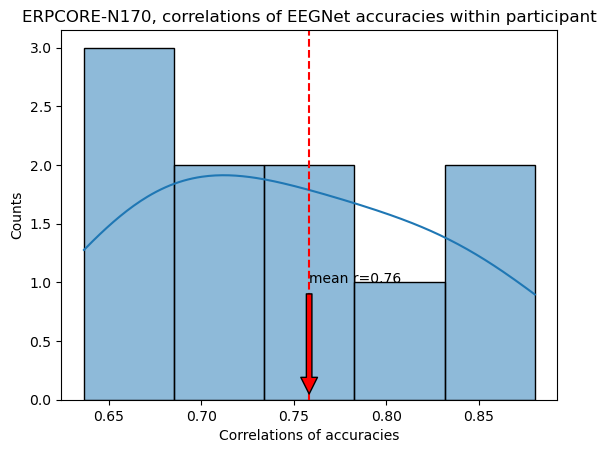

In [10]:
all_corrs_z = np.arctanh(all_corrs)
mean_z = np.mean(all_corrs_z)
mean_r = np.tanh(mean_z)

sns.histplot(all_corrs, kde=True)
plt.axvline(x=mean_r, color='red', linestyle='--', label='mean (r2z->avg->2r)')
plt.annotate(f"mean r={mean_r:.2f}", xy=(mean_r, 0), xytext=(mean_r, 1), arrowprops=dict(facecolor='red', shrink=0.05))
plt.xlabel("Correlations of accuracies")
plt.ylabel("Counts")
plt.title("ERPCORE-N170, correlations of EEGNet accuracies within participant")
plt.savefig("ERPCORE-N170-EEGNet_correlations.png", dpi=300)

In [6]:
accs_to_correlate = ["faces_X_faces_scr", "faces_X_cars_scr"]

# correlate the accuracy values of accs_to_correlate elements used as combis paired in subject for the respective combis

df1 = df[df['combi'] == accs_to_correlate[0]]
df2 = df[df['combi'] == accs_to_correlate[1]]

df1 = df1.sort_values(by=['subject'])
df2 = df2.sort_values(by=['subject'])

np.corrcoef(df1['accuracy'], df2['accuracy'])[0, 1]

0.8146292484622195

In [7]:
accs_to_correlate = ["cars_X_faces_scr", "cars_X_cars_scr"]

# correlate the accuracy values of accs_to_correlate elements used as combis paired in subject for the respective combis

df1 = df[df['combi'] == accs_to_correlate[0]]
df2 = df[df['combi'] == accs_to_correlate[1]]

df1 = df1.sort_values(by=['subject'])
df2 = df2.sort_values(by=['subject'])

np.corrcoef(df1['accuracy'], df2['accuracy'])[0, 1]

0.8803877497673746